# **Gotta catch 'em all !**

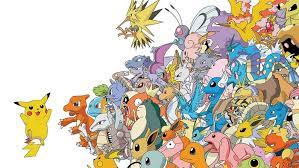

**Welcome to your first assignment of Summer Analytics 2021! We hope you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about Pokemons.**

**We've got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**


***Let's get started with importing numpy, pandas, seaborn and matplotlib!***

Note - matplotlib should be imported with the command :

 `import matplotlib.pyplot as plt`

### Start by importing all important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the csv file and assign it to a variable . 

In [2]:
df = pd.read_csv('SA2021_W1_Pokemon.csv')

### Display shape of dataframe

In [3]:
df.shape

(800, 13)

### Print all columns of dataframe

In [4]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### Remove the column '#' and update the dataframe.

In [5]:
df.drop(columns = '#', inplace = True)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Set the 'Name' column as the index of dataframe

In [6]:
df = df.set_index('Name')
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


###  Print a list of all the unique Type-1 powers

In [7]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

### Create a column which contains the Type 1 and Type 2 abilities of pokemons, seperated with a '+'' sign. Also, display the no. of pokemons that have type-1 power as 'Psychic' and type 2 power as 'Flying' using this new column.

In [8]:
df['Type 1 + 2'] = df['Type 1'] + " + " + df['Type 2']

df['Type 1 + 2'].value_counts()['Psychic + Flying']

6

## GRADED Questions (To be answered in the form)
### Try to retrieve some information from the data and answer the questions below . BEST OF LUCK !!

### 1. How many pokemons have 'Mega' in their name?

In [9]:
(df.index.str.contains('Mega')).sum()

49

### 2. What is the standard deviation of Sp. Def. in the dataset ?

In [10]:
np.round(df['Sp. Def'].describe()['std'],3)

27.829

### 3. What percentage (upto 3 decimal places) of pokemons are legendary ? 

In [11]:
(((df['Legendary']==True).sum())/(df.shape[0]))*100

8.125

### 4. Name the pokemon(s) with Maximum Defense. 

In [12]:
df["Defense"].sort_values(ascending= False).head()

Name
SteelixMega Steelix    230
Shuckle                230
AggronMega Aggron      230
Steelix                200
Regirock               200
Name: Defense, dtype: int64

### 5. Which poison pokemon has the strongest attack ?

In [13]:
df.loc[((df['Type 1']== 'Poison') | (df['Type 2']  == 'Poison')),'Attack'].sort_values(ascending=False).head()

Name
BeedrillMega Beedrill    150
Toxicroak                106
Victreebel               105
Muk                      105
Nidoking                 102
Name: Attack, dtype: int64

### 6. Using seaborn make different types of plots, observe the trend and answer the questions given in the form.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of pokemons')

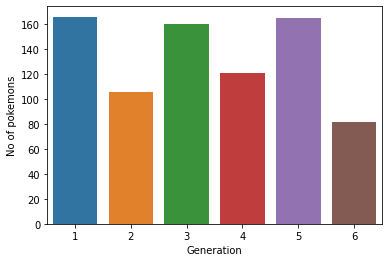

In [14]:
x= df.Generation.value_counts()
ax= sns.barplot(x.index,x.values)
ax.set_xlabel("Generation")
ax.set_ylabel("No of pokemons")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


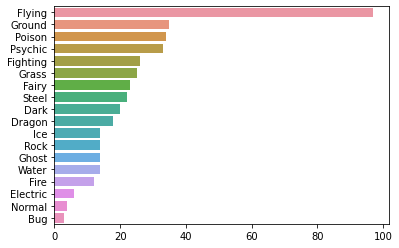

In [15]:
y= df["Type 2"].value_counts()
sns.barplot(y.values,y.index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


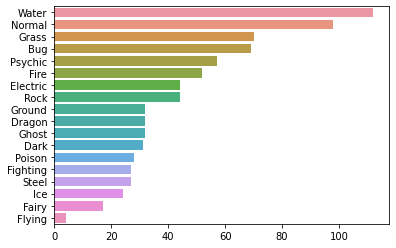

In [16]:
x= df["Type 1"].value_counts()
sns.barplot(x.values,x.index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of Legendary pokemons')

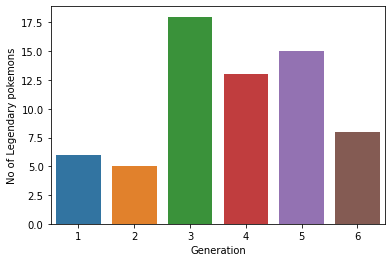

In [17]:
legendary = df[df['Legendary']==True]
x= legendary.Generation.value_counts()
ax= sns.barplot(x.index,x.values)
ax.set_xlabel("Generation")
ax.set_ylabel("No of Legendary pokemons")

In [18]:
df[(df['Type 1']=='Psychic')&(df['Type 2']=='Flying')]

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1 + 2
Name,,,,,,,,,,,,
Natu,Psychic,Flying,320,40,50,45,70,45,70,2,False,Psychic + Flying
Xatu,Psychic,Flying,470,65,75,70,95,70,95,2,False,Psychic + Flying
Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True,Psychic + Flying
Woobat,Psychic,Flying,313,55,45,43,55,43,72,5,False,Psychic + Flying
Swoobat,Psychic,Flying,425,67,57,55,77,55,114,5,False,Psychic + Flying
Sigilyph,Psychic,Flying,490,72,58,80,103,80,97,5,False,Psychic + Flying


### 7. Which is the second fastest non-legendary 'Ghost' type pokemon from 4th generation ?

In [19]:
df.loc[(((df['Type 1']== 'Ghost') | (df['Type 2']  == 'Ghost')) & (df['Legendary']==False) & (df['Generation']==4)),'Speed'].sort_values(ascending=False).head()

Name
Froslass     110
Mismagius    105
Rotom         91
Drifblim      80
Drifloon      70
Name: Speed, dtype: int64

### 8. How many non-legendary pokemons have stronger defence but weaker attack than Charizard?

In [20]:
df[df.index == 'Charizard']

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1 + 2
Name,,,,,,,,,,,,
Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Fire + Flying


In [21]:
df[(df.Attack<84)&(df.Defense>78)&(df.Legendary==False)].shape[0]

116


## *Congratulations on coming this far! Since we were having so much fun playing with this dataset, here are some bonus questions that you can try to further deepen your understanding of the topic!*

### **Note:** These questions are UNGRADED, and are given as an extra exercise.

### Which pokemon has the highest combined value of Attack and Sp. Atk ?

In [22]:
df['Combined'] = df['Attack'] + df['Sp. Atk']
df.Combined.sort_values(ascending=False).head()

Name
RayquazaMega Rayquaza    360
DeoxysAttack Forme       360
MewtwoMega Mewtwo X      344
MewtwoMega Mewtwo Y      344
GroudonPrimal Groudon    330
Name: Combined, dtype: int64

### Which type of legendary pokemons are the most common?

In [23]:
print(legendary['Type 1'].value_counts().head() , legendary['Type 2'].value_counts().head())

Psychic    14
Dragon     12
Fire        5
Ground      4
Rock        4
Name: Type 1, dtype: int64 Flying      13
Psychic      5
Fighting     4
Dragon       4
Ice          3
Name: Type 2, dtype: int64


### How many generation-3, non-legendary pokemons have higher HP than the weakest generation-6, legendary pokemon?

In [24]:
df[(df.Legendary==True)&(df.Generation ==6)].HP.min()

50

In [25]:
df[(df.Legendary==False)&(df.Generation==3)&(df.HP>50)].shape[0]

95

### Print out the third slowest pokemon(s) in the dataset.

In [26]:
df.Speed.sort_values().head(15)

Name
Munchlax       5
Shuckle        5
Ferroseed     10
Bonsly        10
Trapinch      10
Silcoon       15
Foongus       15
Wooper        15
Slowpoke      15
Cleffa        15
Igglybuff     15
Roggenrola    15
Cascoon       15
Pineco        15
Escavalier    20
Name: Speed, dtype: int64

### Which pokemon type has the highest average HP?

In [27]:
((df.groupby('Type 2').HP.mean())+(df.groupby('Type 1').HP.mean()))/2

Type 2
Bug         55.108696
Dark        71.178226
Dragon      82.739583
Electric    73.981061
Fairy       69.210997
Fighting    74.656695
Fire        70.576923
Flying      71.070876
Ghost       61.790179
Grass       64.955714
Ground      75.504911
Ice         81.000000
Normal      70.387755
Poison      63.007353
Psychic     71.421850
Rock        66.717532
Steel       64.929293
Water       67.388393
Name: HP, dtype: float64